# clustering using K-Means

In [39]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
data = pd.read_csv(r"C:\Users\sweet\Downloads\datasets\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# preprocessing 

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
#label encoding Gender col
le =LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
x=data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca

array([[-1.09383941e+02, -5.47845404e+00],
       [-1.08202857e+02,  3.49317649e+01],
       [-1.07376292e+02, -3.78408717e+01],
       [-1.06007807e+02,  3.05626965e+01],
       [-1.04980323e+02, -7.29674715e+00],
       [-1.03774723e+02,  2.98012381e+01],
       [-1.02996481e+02, -4.13227699e+01],
       [-1.01426745e+02,  4.70713035e+01],
       [-1.00952191e+02, -5.09237382e+01],
       [-9.93805223e+01,  2.40346077e+01],
       [-9.90706564e+01, -4.09178725e+01],
       [-9.74040858e+01,  4.91523683e+01],
       [-9.67777825e+01, -3.78938689e+01],
       [-9.52523148e+01,  3.02508027e+01],
       [-9.48417033e+01, -3.50274282e+01],
       [-9.34009908e+01,  3.26452221e+01],
       [-9.24499251e+01, -1.31741290e+01],
       [-9.12420152e+01,  2.04349779e+01],
       [-8.99471970e+01, -2.29456992e+01],
       [-8.84752130e+01,  4.81072460e+01],
       [-8.75736418e+01, -1.32190190e+01],
       [-8.63488497e+01,  2.60551150e+01],
       [-8.56046385e+01, -4.49591024e+01],
       [-8.

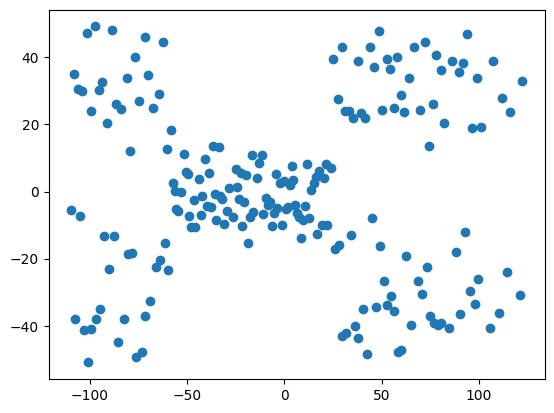

In [23]:
plt.scatter(x_pca[:,0],x_pca[:,1])

<Figure size 2500x2000 with 0 Axes>

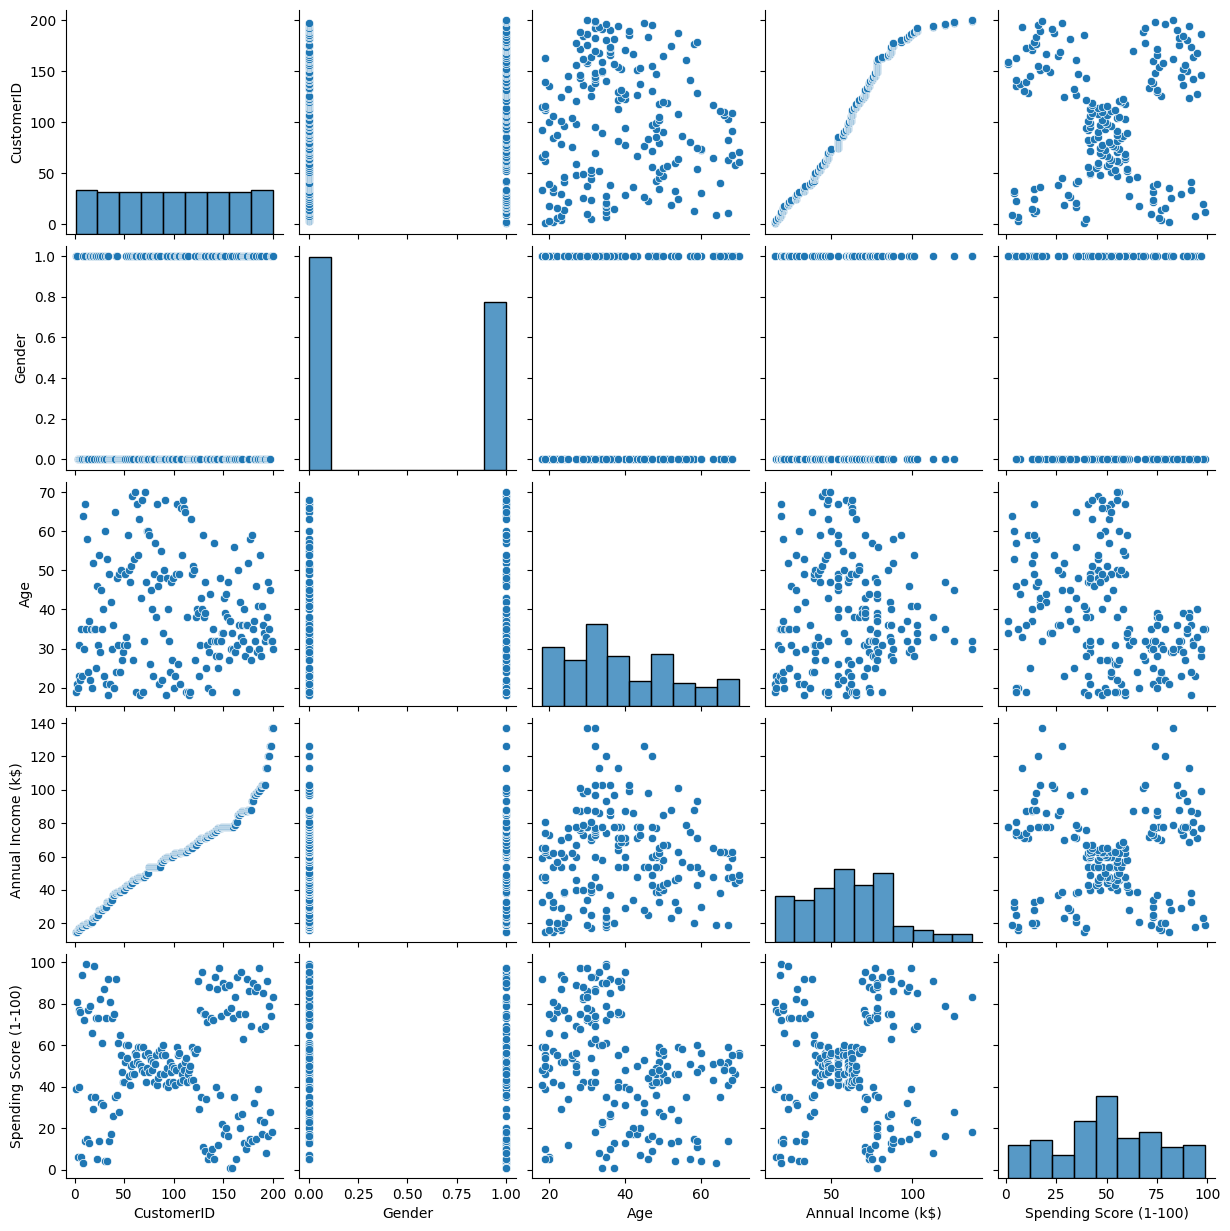

<Figure size 2500x2000 with 0 Axes>

In [22]:
sns.pairplot(data=data)
plt.figure(figsize=(25,20))

In [51]:
#model building
wcss=[]
for k in range(2,20):
    km=KMeans(n_clusters=k,init="k-means++")
    km.fit(data)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

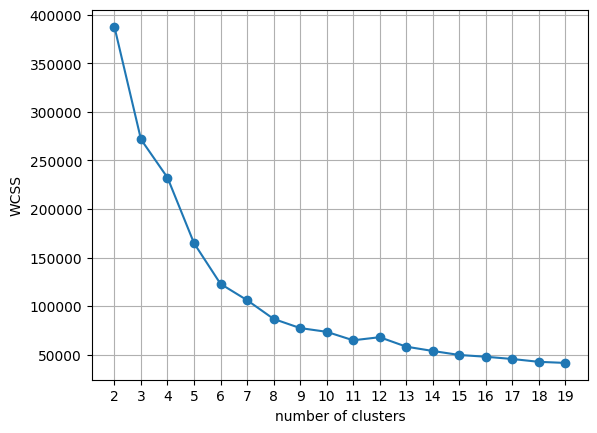

In [52]:
#visualization of wcss with k
plt.plot([i for i in range(2,20)],wcss,"o-")
plt.xlabel("number of clusters")
plt.xticks(ticks = [i for i in range(2,20)])
plt.grid()
plt.ylabel("WCSS")


In [34]:
#using the optimal clusters as 5
kmn = KMeans(n_clusters=5,init='k-means++')
data["predict"] = kmn.fit_predict(data)

In [35]:
data["predict"]

0      2
1      3
2      2
3      3
4      2
      ..
195    4
196    1
197    4
198    1
199    4
Name: predict, Length: 200, dtype: int32

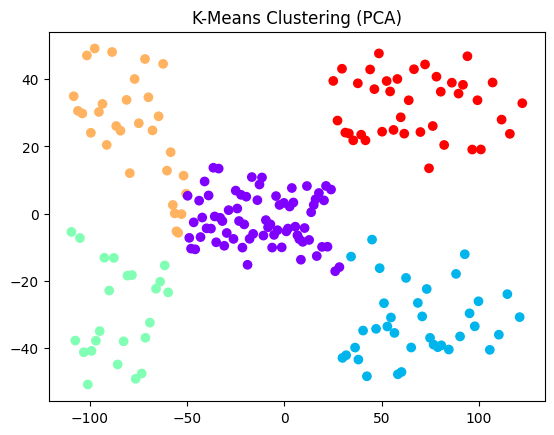

In [43]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=data["predict"], cmap='rainbow')
plt.title("K-Means Clustering (PCA)")
plt.show()

In [42]:
#evaluate clusters using silhoutee score
score = silhouette_score(x,data["predict"])
print("Silhoutte Score is :",score)
if score > 0.7:
    print("Clusters are well-separated and highly distinct.")
elif 0.4 <= score <= 0.7:
    print("Clusters are reasonably structured but may overlap slightly.")
elif 0 <= score < 0.4:
    print("Clusters are overlapping or not well-defined.")
else:
    print("Clusters are likely assigned incorrectly (negative score).")

Silhoutte Score is : 0.43726318784226204
Clusters are reasonably structured but may overlap slightly.
